In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from util.stockdata_helper import get_stockdata_tickers
from util.file_util import StockDataFileReader
from util.plot_util import plot_time_series

In [4]:
start_date = '2018-01-01'
end_date = '2019-08-10'

In [5]:
tickers = get_stockdata_tickers()

In [6]:
stock_data_reader = StockDataFileReader()

In [7]:
sample_ticker = np.random.choice(tickers)
sample_ticker

'NUVA'

In [10]:
sample_ticker = 'BYND'

In [11]:
temp = stock_data_reader.read_stockdata_in_range(sample_ticker,
                                                 start_date,
                                                 end_date)

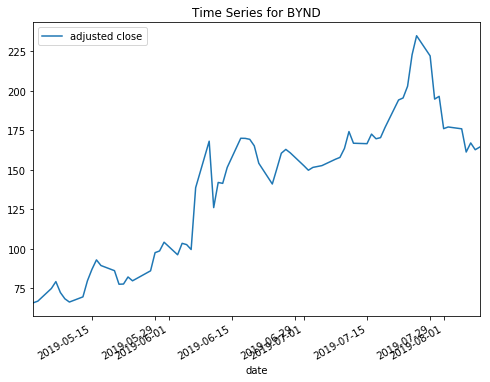

In [12]:
plot_time_series(temp,
                 title='Time Series for {}'.format(sample_ticker))

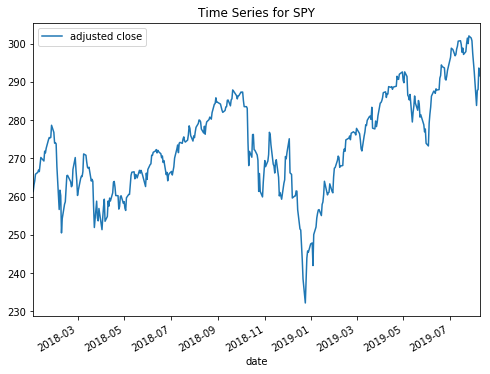

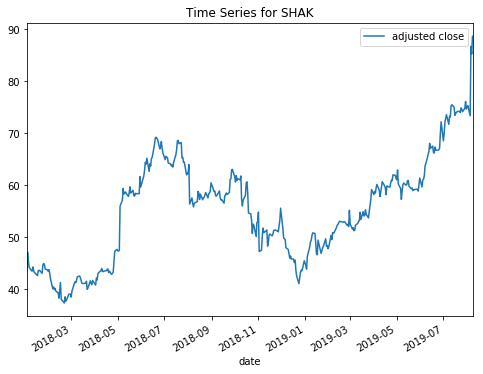

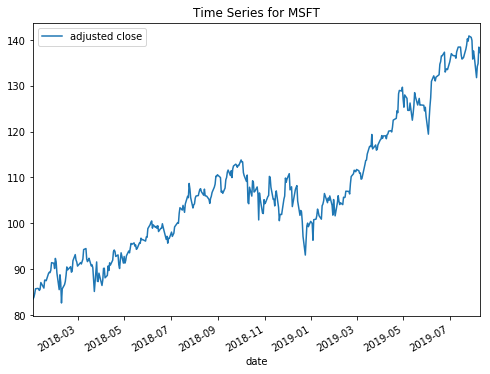

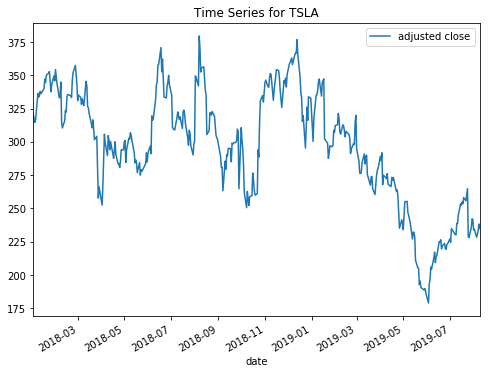

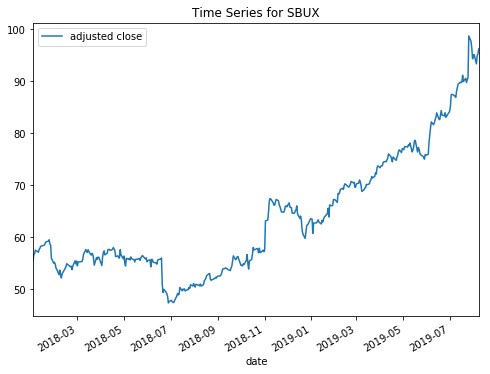

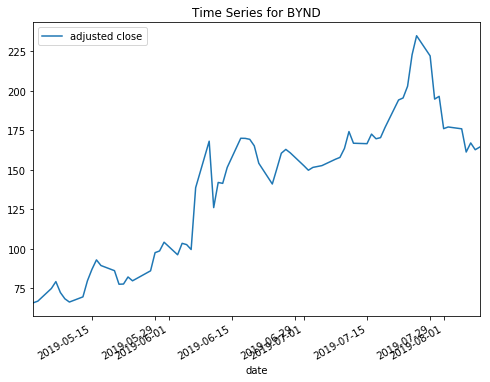

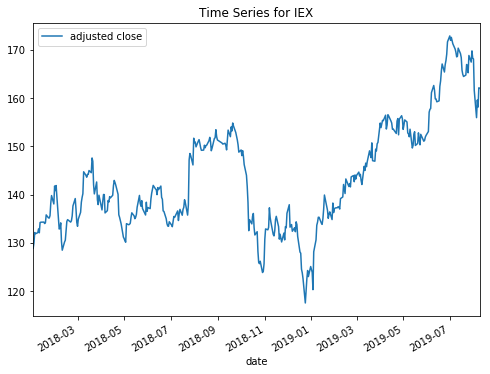

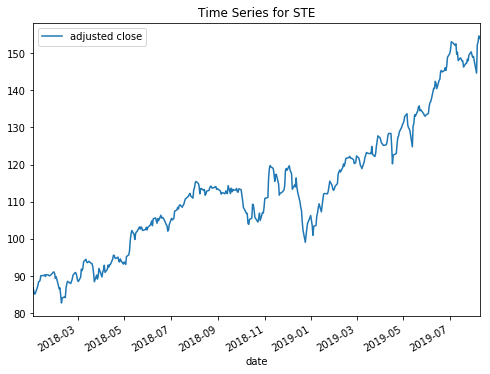

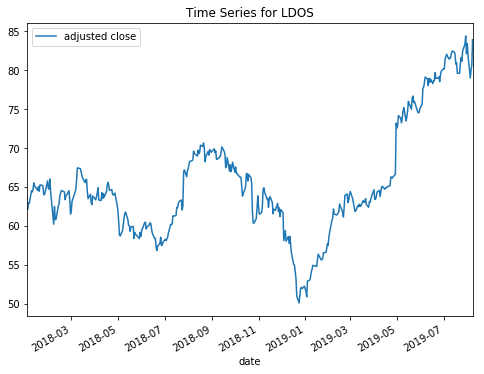

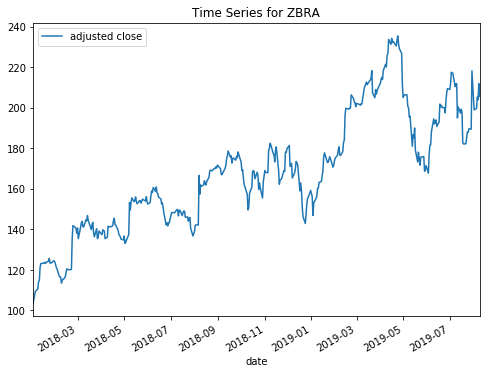

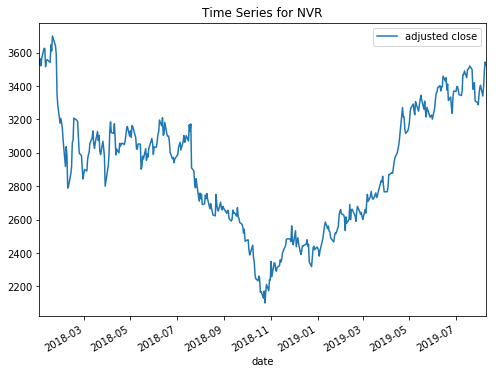

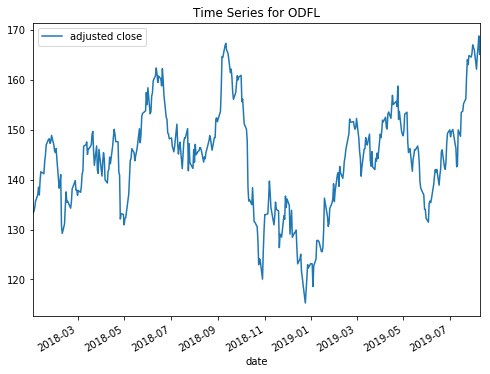

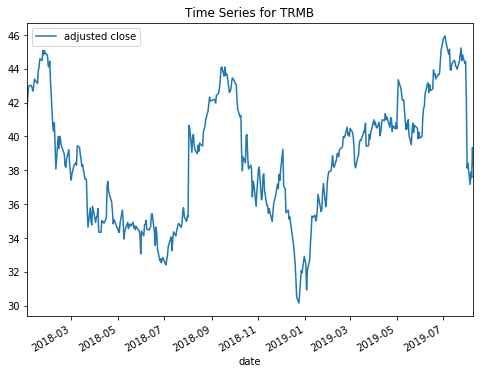

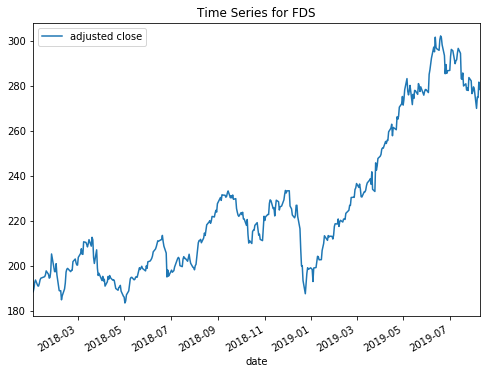

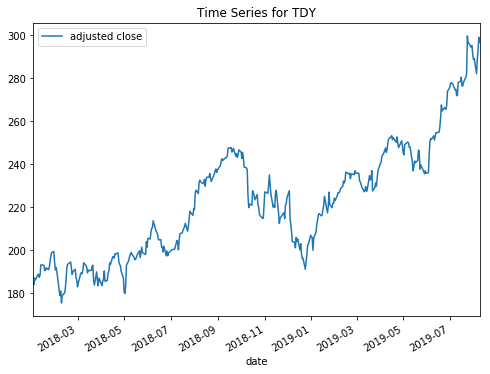

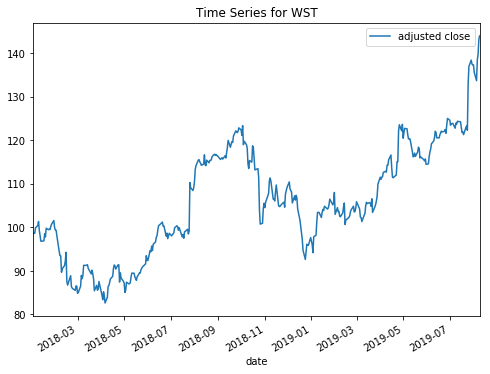

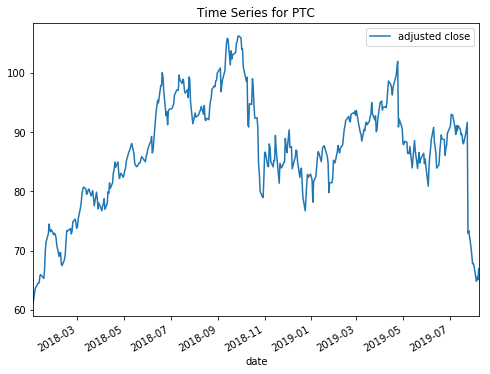

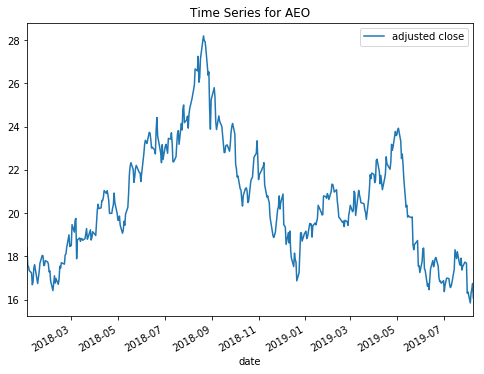

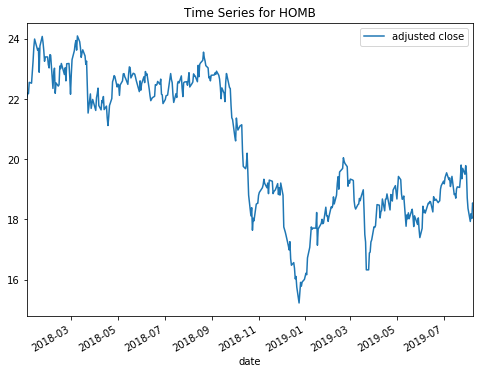

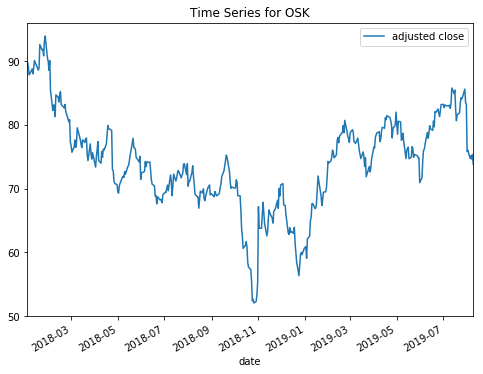

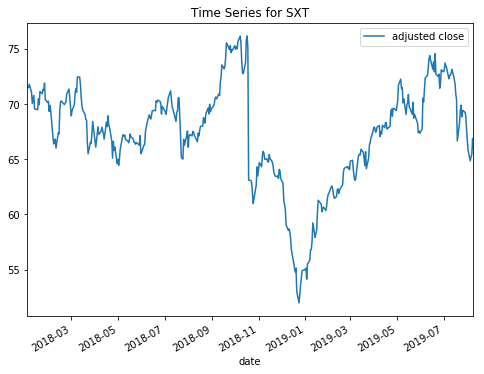

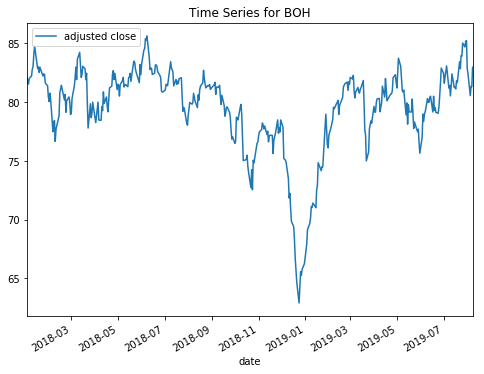

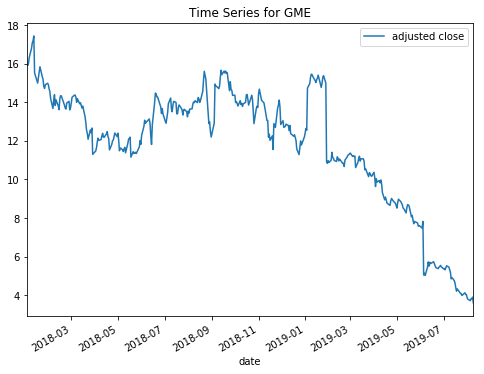

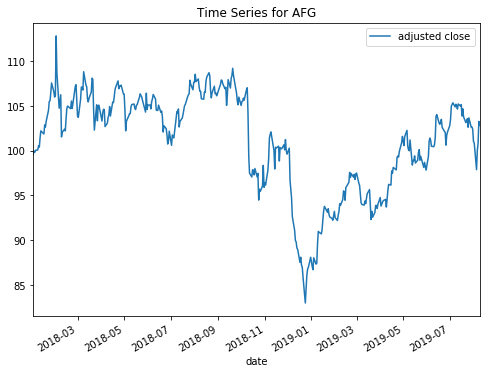

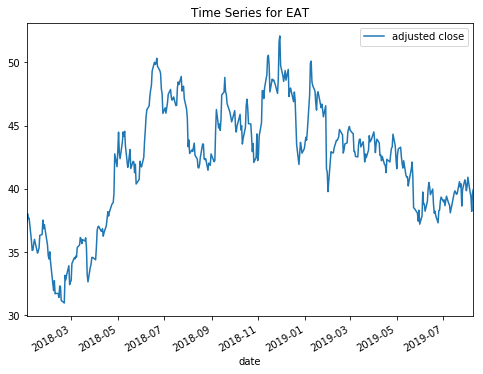

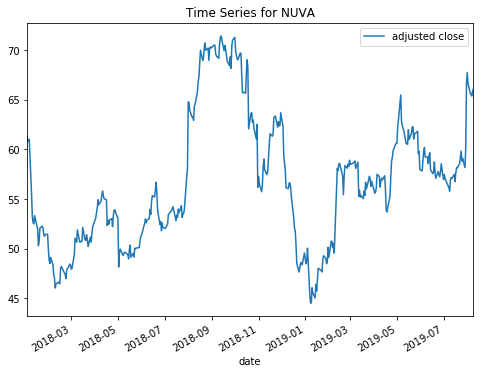

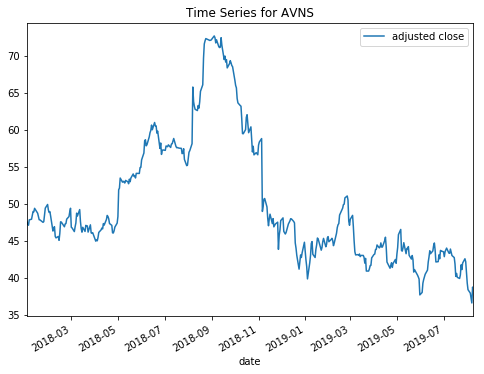

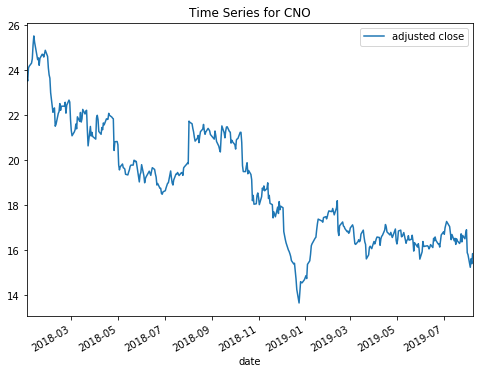

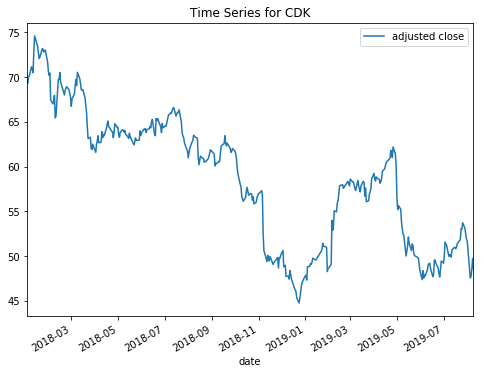

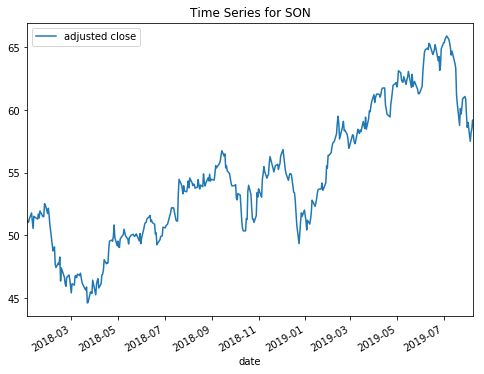

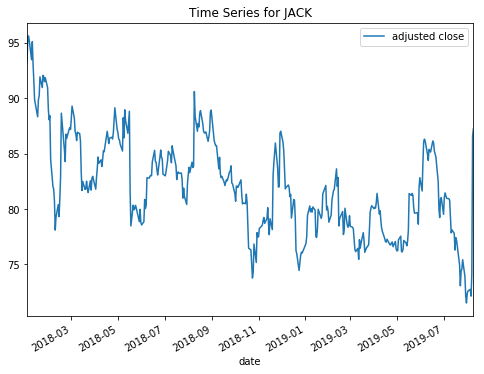

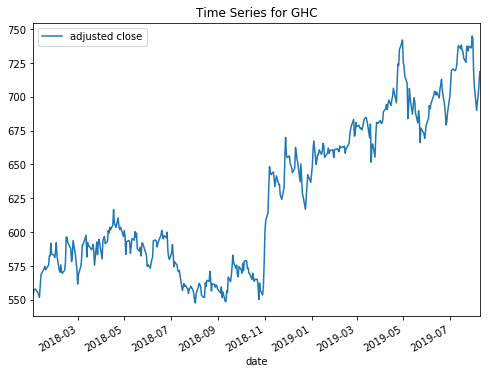

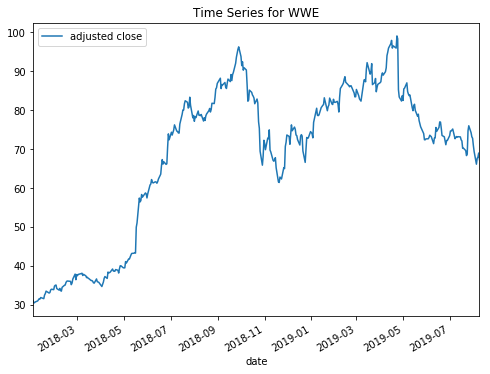

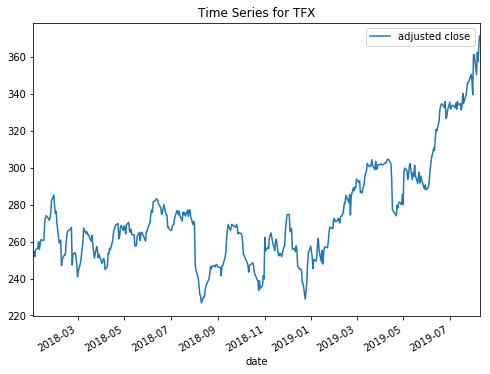

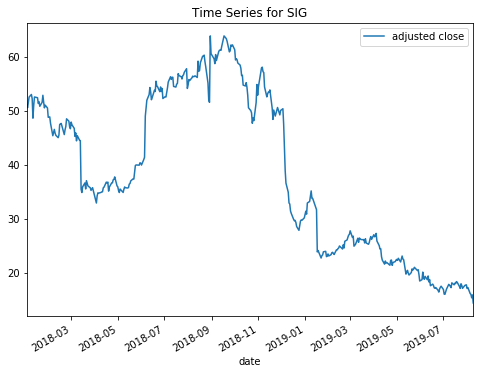

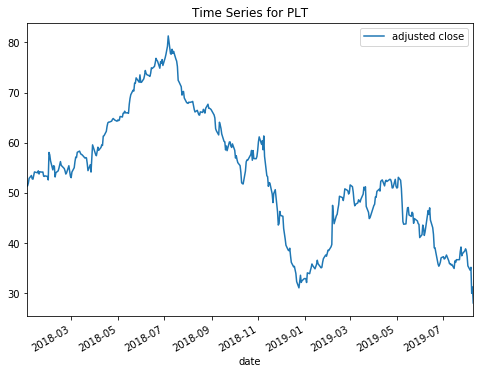

In [16]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    
    title = 'Time Series for {}'.format(ticker)
    plot_time_series(ticker_df,
                     title=title)
    plt.show()

## Check for large holes in data

In [17]:
all_dates = set()

In [18]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    all_dates = all_dates | set(ticker_df.index.strftime('%Y-%m-%d'))

In [21]:
for ticker in tickers:
    ticker_df = stock_data_reader.read_stockdata_in_range(ticker,
                                                          start_date,
                                                          end_date,
                                                          columns=['date', 'adjusted close'])
    
    missing_dates = all_dates - set(ticker_df.index.strftime('%Y-%m-%d'))
    if len(missing_dates):
        print('{} - missing {} dates'.format(ticker, len(missing_dates)))
        sorted_missing_dates = sorted(missing_dates)
        print('missing data start: ', sorted_missing_dates[0])
        print('missing data end: ', sorted_missing_dates[-1])
        print('\n')
    

BYND - missing 334 dates
missing data start:  2018-01-02
missing data end:  2019-05-01




#### No dates missing among our tickers so far

Beyond Meat IPO'ed on 2019/5/2

### Sanity Check

In [22]:
from util.stockdata_helper import (
    get_daily_returns_for_ticker, get_mkt_adjusted_returns_for_ticker)

In [23]:
prices_df = stock_data_reader.read_stockdata_in_range('SPY',
                                                      start_date, 
                                                      end_date)

In [24]:
returns_df = get_daily_returns_for_ticker('SPY', start_date, end_date)
mkt_adjust_returns_df = get_mkt_adjusted_returns_for_ticker('SPY', start_date, end_date)

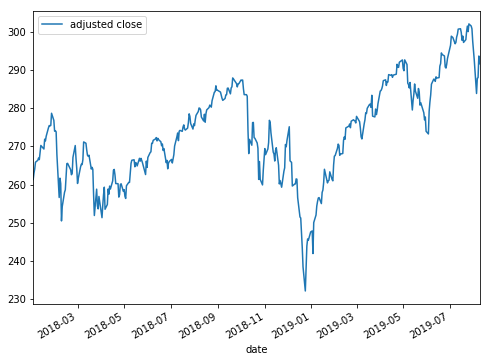

In [25]:
plot_time_series(prices_df)

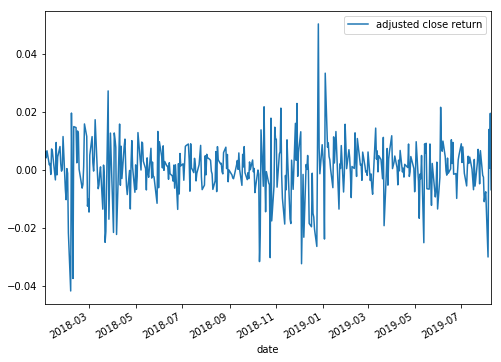

In [26]:
plot_time_series(returns_df)

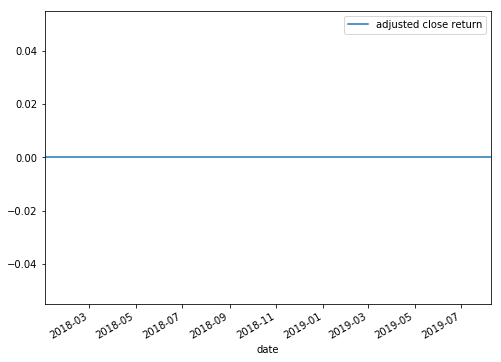

In [27]:
plot_time_series(mkt_adjust_returns_df)